# Data Preprocessing

#### Step 1: Import the data

In [33]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import modules from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report,make_scorer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rvyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rvyas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
data = pd.read_excel("C:\\Project\\AIML\\Capstone_Project\\Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")

In [35]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [17]:
data.shape

(425, 11)

#### Step 2: Data cleansing

In [36]:
missing_values = data.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64


- No missing values present in the data set

In [37]:
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [20]:
data.describe()

,Unnamed: 0,Data
count,425.000000,425
mean,224.084706,2016-09-20 16:46:18.352941312
min,0.000000,2016-01-01 00:00:00
25%,118.000000,2016-05-01 00:00:00
50%,226.000000,2016-09-13 00:00:00
75%,332.000000,2017-02-08 00:00:00
max,438.000000,2017-07-09 00:00:00
std,125.526786,NaN


## Exploratory Data Analysis (EDA)

In [38]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

C:\Users\rvyas\AppData\Local\Temp\ipykernel_6272\3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


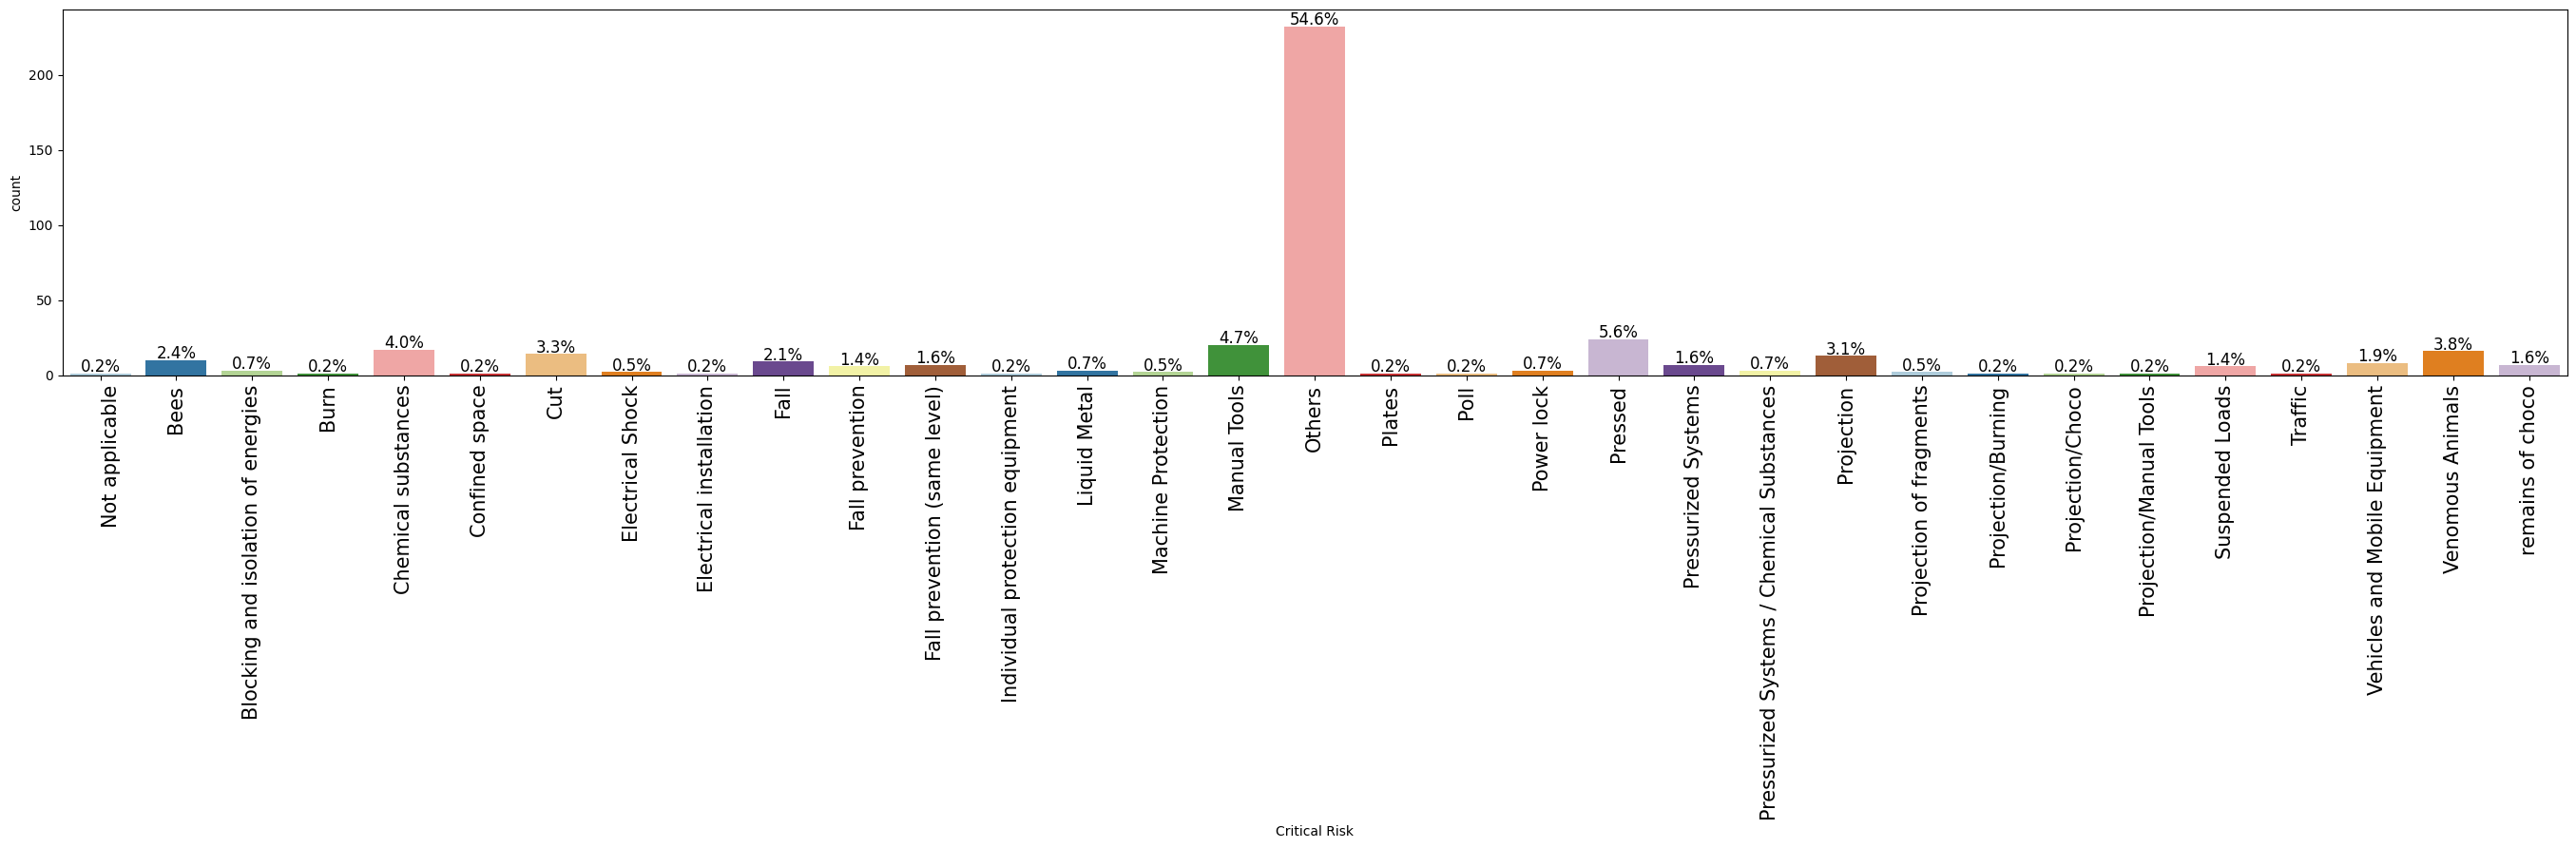

In [39]:
import seaborn as sns
labeled_barplot(data, "Critical Risk", perc=True)

#### Distribution of accident level

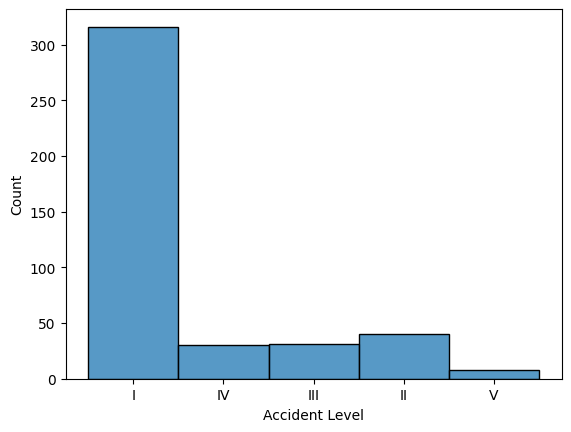

In [40]:
sns.histplot(data, x='Accident Level', bins =50);

#### Distribution of potential accident level

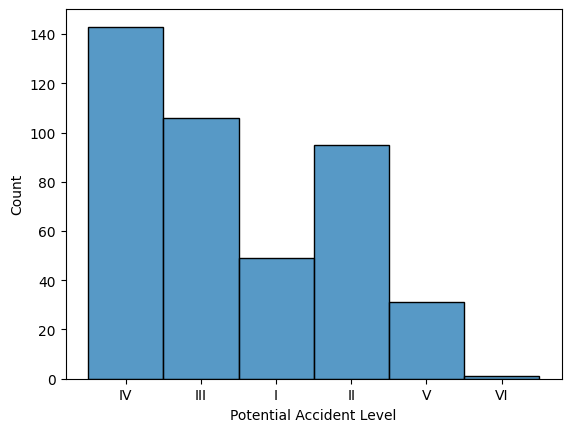

In [41]:
sns.histplot(data, x='Potential Accident Level', bins =50);

### Bivariate Analysis

Let us check the relationship between accident level and genre

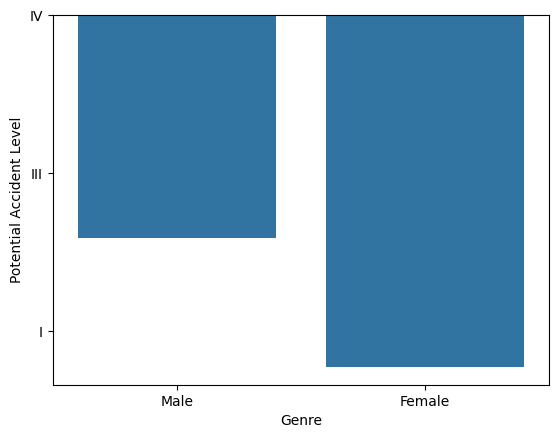

In [42]:
sns.barplot(data, y='Potential Accident Level', x='Genre', errorbar=('ci', False));

#### Step 3: Data preprocessing (NLP Preprocessing techniques) 

### Removing special characters from the text

In [43]:
# to use regular expressions for manipulating text data
import re
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [44]:
# Applying the function to remove special characters
data['cleaned_text'] = data['Description'].apply(remove_special_characters)

In [45]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','cleaned_text']]

,Description,cleaned_text
0,While removing the drill rod of the Jumbo 08 f...,While removing the drill rod of the Jumbo 08 f...
1,During the activation of a sodium sulphide pum...,During the activation of a sodium sulphide pum...
2,In the sub-station MILPO located at level +170...,In the sub station MILPO located at level 170 ...
3,Being 9:45 am. approximately in the Nv. 1880 C...,Being 9 45 am approximately in the Nv 1880 CX ...


- We can observe that the function removed the special characters and retained the alphabets and numbers.

### Lowercasing

In [46]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [47]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','cleaned_text']]

,Description,cleaned_text
0,While removing the drill rod of the Jumbo 08 f...,while removing the drill rod of the jumbo 08 f...
1,During the activation of a sodium sulphide pum...,during the activation of a sodium sulphide pum...
2,In the sub-station MILPO located at level +170...,in the sub station milpo located at level 170 ...
3,Being 9:45 am. approximately in the Nv. 1880 C...,being 9 45 am approximately in the nv 1880 cx ...


- We can observe that all the text has now successfully been converted to lower case.

### Removing stopwords

* The idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `NLTK` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [48]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [49]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [50]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,while removing the drill rod of the jumbo 08 f...,removing drill rod jumbo 08 maintenance superv...
1,during the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,in the sub station milpo located at level 170 ...,sub station milpo located level 170 collaborat...
3,being 9 45 am approximately in the nv 1880 cx ...,9 45 approximately nv 1880 cx 695 ob7 personne...


* We observe that all the stopwords have been removed.

### Stemming

Stemming is a language processing method that chops off word endings to find the root or base form of words.

For example,

- Original Word: Jumping, Stemmed Word: Jump
- Original Word: Running, Stemmed Word: Run

In [51]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [52]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [53]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [55]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,removing drill rod jumbo 08 maintenance superv...,remov drill rod jumbo 08 mainten supervisor pr...
1,activation sodium sulphide pump piping uncoupl...,activ sodium sulphid pump pipe uncoupl sulfid ...
2,sub station milpo located level 170 collaborat...,sub station milpo locat level 170 collabor exc...


## Text Vectorization

- We'll use the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class of sklearn to vectorize the data using Bag of Words (BoW).

- We first create the document-term matrix, where each value in the matrix stores the count of a term in a document.

- We then consider only the top *n* terms by frequency
    - *n* is a hyperparameter that one can change and experiment with

In [56]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(425, 1000)

In [57]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [58]:
# Checking the words considered by BoW model
words

array(['00', '01', '018', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '100', '11', '12', '13', '14', '15', '16', '17', '1710',
       '18', '1850', '187', '1880', '19', '1940', '1st', '20', '200',
       '2016', '2017', '22', '24', '25', '26', '27', '2900', '2930',
       '2995', '2m', '2nd', '30', '3300', '3450', '35', '350', '3cm',
       '3m', '3rd', '40', '440', '45', '4th', '50', '500', '54', '5th',
       '60', '6m', '70', '75', '80', '90', 'abl', 'abruptli', 'access',
       'accessori', 'accid', 'accommod', 'accompani', 'accord', 'accumul',
       'acid', 'across', 'action', 'activ', 'addit', 'adjust', 'advanc',
       'affect', 'ahead', 'aid', 'air', 'albino', 'align', 'allerg',
       'allergi', 'alon', 'along', 'alpha', 'alreadi', 'aluminum',
       'amount', 'ampoload', 'anchor', 'anfoload', 'angl', 'ankl', 'anod',
       'anoth', 'appar', 'appear', 'appli', 'approach', 'approx',
       'approxim', 'arc', 'area', 'aripuan', 'arm', 'around', 'arrang',
      

#### Step 4: Data preparation - Cleansed data in .xlsx or .csv file

In [59]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,00,01,018,02,03,04,05,06,07,08,...,wore,work,worker,workshop,would,wound,wrench,wrist,zinc,zone
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
df_BOW.to_csv("preprocessed_data.csv", index=False)

#### Step 5: Design train and test basic machine learning classifiers 

## Splitting the dataset

In [73]:
# Creating dependent and independent variables
X = df_BOW
y = data['Potential Accident Level']

In [74]:
from sklearn.model_selection import train_test_split

# Initial split into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [62]:
X_train.shape, X_test.shape, X_valid.shape

((340, 1000), (43, 1000), (42, 1000))

In [75]:
from sklearn.preprocessing import LabelEncoder
# Instantiate a LabelEncoder to encode categorical labels into numerical values
encoder = LabelEncoder()

# Create DataFrames for training, validation, and testing sets
# Encoding the target variable and adding it to the respective DataFrames
# Resetting index for consistency in DataFrames

# Training set
ds_train = pd.DataFrame(data=X_train, columns=['Description'])
ds_train['target'] =  encoder.fit_transform(y_train)
ds_train = ds_train.reset_index(drop=True)

# # Validation set
ds_valid = pd.DataFrame(data=X_valid, columns=['Description'])
ds_valid['target'] =  encoder.transform(y_valid)
ds_valid = ds_valid.reset_index(drop=True)

# # Testing set
ds_test = pd.DataFrame(data=X_test, columns=['Description'])
ds_test['target'] =  encoder.transform(y_test)
ds_test = ds_test.reset_index(drop=True)

## Model Building

In [76]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [77]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="weighted")  # to compute Recall
    precision = precision_score(target, pred,average="weighted")  # to compute Precision
    f1 = f1_score(target, pred,average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Random Forest Model (default with BOW)

In [78]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

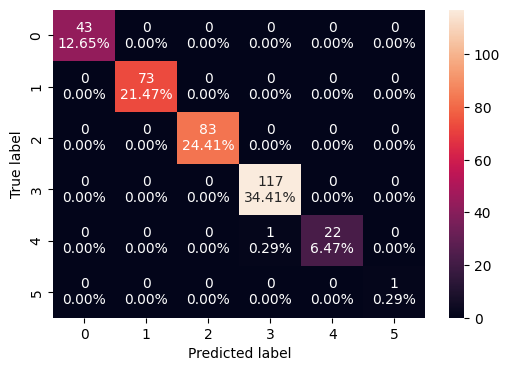

In [79]:
confusion_matrix_sklearn(rf_bow, X_train, y_train)

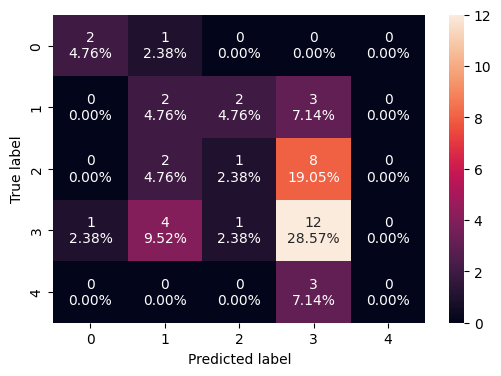

In [80]:
confusion_matrix_sklearn(rf_bow, X_valid, y_valid)

* Here, 0 represents accident level I, 1 represents II level and so on

In [81]:
# Predicting on train data
y_pred_train = rf_bow.predict(X_train)

# Predicting on validation data
y_pred_valid = rf_bow.predict(X_valid)

In [82]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00        43
          II       1.00      1.00      1.00        73
         III       1.00      1.00      1.00        83
          IV       0.99      1.00      1.00       117
           V       1.00      0.96      0.98        23
          VI       1.00      1.00      1.00         1

    accuracy                           1.00       340
   macro avg       1.00      0.99      1.00       340
weighted avg       1.00      1.00      1.00       340



In [83]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           I       0.67      0.67      0.67         3
          II       0.22      0.29      0.25         7
         III       0.25      0.09      0.13        11
          IV       0.46      0.67      0.55        18
           V       0.00      0.00      0.00         3

    accuracy                           0.40        42
   macro avg       0.32      0.34      0.32        42
weighted avg       0.35      0.40      0.36        42



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

- The model achieved an 67% recall score on the validation dataset.
- However, it failed to identify the potential accident level 3, 5 & 6 level.
- This might be due to the high imbalance of the target classes.

In [84]:
rf_train_perf = model_performance_classification_sklearn(
    rf_bow, X_train, y_train
)

In [85]:
rf_valid_perf = model_performance_classification_sklearn(
    rf_bow, X_valid, y_valid
)

C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest (with class_weights and BOW)

In [86]:
rf_bow_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_bow_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

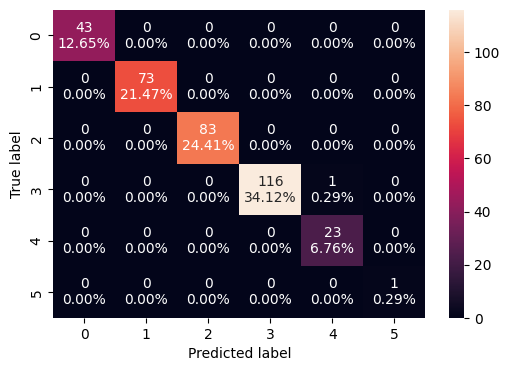

In [87]:
confusion_matrix_sklearn(rf_bow_balanced, X_train, y_train)

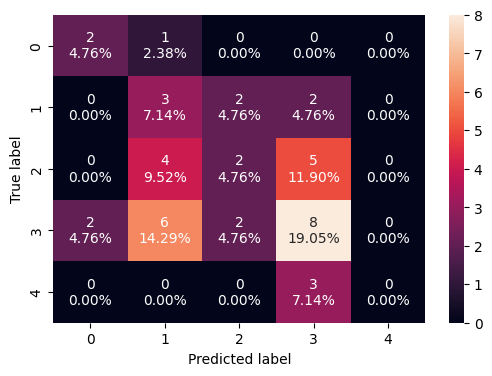

In [88]:
confusion_matrix_sklearn(rf_bow_balanced, X_valid, y_valid)

In [89]:
# Predicting on train data
y_pred_train_bow = rf_bow_balanced.predict(X_train)

# Predicting on test data
y_pred_valid_bow = rf_bow_balanced.predict(X_valid)

**Classification report**

In [90]:
print(classification_report(y_train, y_pred_train_bow))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00        43
          II       1.00      1.00      1.00        73
         III       1.00      1.00      1.00        83
          IV       1.00      0.99      1.00       117
           V       0.96      1.00      0.98        23
          VI       1.00      1.00      1.00         1

    accuracy                           1.00       340
   macro avg       0.99      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340



In [91]:
print(classification_report(y_valid, y_pred_valid_bow))

              precision    recall  f1-score   support

           I       0.50      0.67      0.57         3
          II       0.21      0.43      0.29         7
         III       0.33      0.18      0.24        11
          IV       0.44      0.44      0.44        18
           V       0.00      0.00      0.00         3

    accuracy                           0.36        42
   macro avg       0.30      0.34      0.31        42
weighted avg       0.35      0.36      0.34        42



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

- The model's performance not improved much, and it is clear that overfitting is occurring as the model struggles to generalize on the validation dataset.
- We will now proceed to tune the model.







In [92]:
rf_bal_train_perf = model_performance_classification_sklearn(
    rf_bow_balanced, X_train, y_train
)

In [93]:
rf_bal_valid_perf = model_performance_classification_sklearn(
    rf_bow_balanced, X_valid, y_valid
)

C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest (with hyperparamter tuning and BOW)

In [94]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 10, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = make_scorer(recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [95]:
# Creating a new model with the best combination of parameters
rf_bow_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_bow_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=5, n_estimators=30, random_state=42)

**Confusion Matrix**

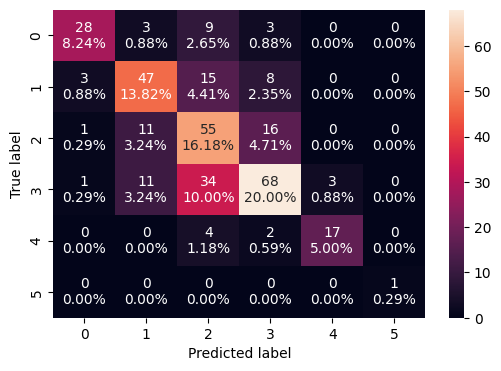

In [96]:
confusion_matrix_sklearn(rf_bow_tuned, X_train, y_train)

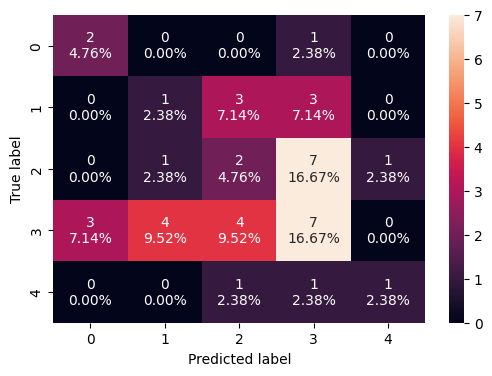

In [97]:
confusion_matrix_sklearn(rf_bow_tuned, X_valid, y_valid)

In [98]:
# Predicting on train data
y_pred_train_bow = rf_bow_tuned.predict(X_train)

# Predicting on validation data
y_pred_valid_bow = rf_bow_tuned.predict(X_valid)

**Classification report**

In [99]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00        43
          II       1.00      1.00      1.00        73
         III       1.00      1.00      1.00        83
          IV       0.99      1.00      1.00       117
           V       1.00      0.96      0.98        23
          VI       1.00      1.00      1.00         1

    accuracy                           1.00       340
   macro avg       1.00      0.99      1.00       340
weighted avg       1.00      1.00      1.00       340



In [100]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           I       0.67      0.67      0.67         3
          II       0.22      0.29      0.25         7
         III       0.25      0.09      0.13        11
          IV       0.46      0.67      0.55        18
           V       0.00      0.00      0.00         3

    accuracy                           0.40        42
   macro avg       0.32      0.34      0.32        42
weighted avg       0.35      0.40      0.36        42



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [101]:
rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_bow_tuned, X_train, y_train
)

In [102]:
rf_tuned_valid_perf = model_performance_classification_sklearn(
    rf_bow_tuned, X_valid, y_valid
)

## Model Performance Comparison and Final Model Selection

In [103]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_train_perf.T,
        rf_bal_train_perf.T,
        rf_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned)
Accuracy,0.997059,0.997059,0.635294
Recall,0.997059,0.997059,0.635294
Precision,0.997084,0.997181,0.663898
F1,0.997032,0.997084,0.641763


In [104]:
# validation set performance comparison

models_valid_comp_df = pd.concat(
    [
        rf_valid_perf.T,
        rf_bal_valid_perf.T,
        rf_tuned_valid_perf.T,
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)"
]
print("Validation set performance comparison:")
models_valid_comp_df

Validation set performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned)
Accuracy,0.404762,0.357143,0.309524
Recall,0.404762,0.357143,0.309524
Precision,0.347934,0.349206,0.302339
F1,0.357973,0.340536,0.301976


- **Observation**: The recall score difference between the train and validation sets is notably higher even if we use class_weights and tuned model

- **Conclusion**: We would need to test with other model as validation accuracy, recall and precision result is very poor.

## Model Testing OF RANDOM FOREST

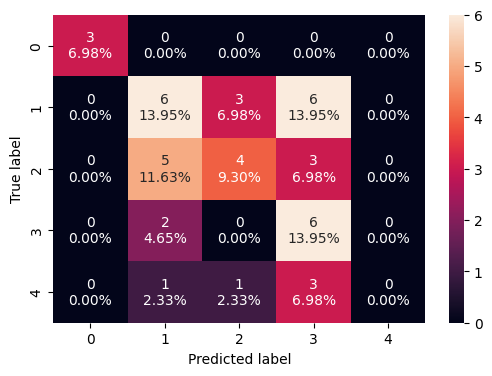

In [106]:
confusion_matrix_sklearn(rf_bow_balanced, X_test, y_test)

In [107]:
# Predicting on test data
y_pred_test = rf_bow_balanced.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00         3
          II       0.43      0.40      0.41        15
         III       0.50      0.33      0.40        12
          IV       0.33      0.75      0.46         8
           V       0.00      0.00      0.00         5

    accuracy                           0.44        43
   macro avg       0.45      0.50      0.46        43
weighted avg       0.42      0.44      0.41        43



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

- The model achieved a recall of 100% to identify level 1 accident on the test dataset but unable to identify accident level 5 & 6
- Let's use another machine learning algorithm

### Naive Bayes Classifier

In [111]:
nb_classifier = MultinomialNB()

In [112]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

**Confusion Matrix**

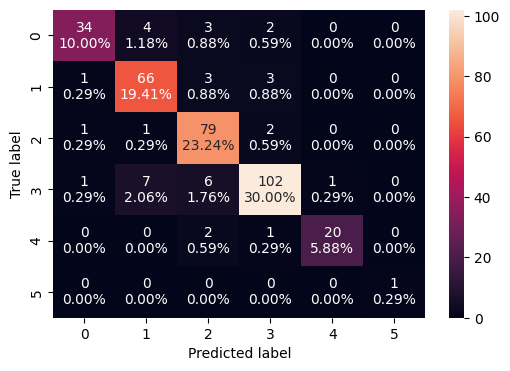

In [113]:
confusion_matrix_sklearn(nb_classifier, X_train, y_train)

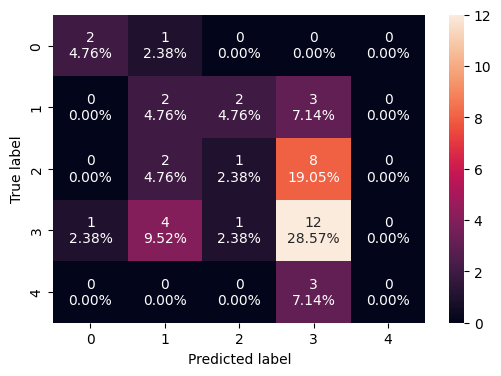

In [114]:
confusion_matrix_sklearn(rf_bow, X_valid, y_valid)

In [115]:
# Predicting on train data
y_pred_train_nb = nb_classifier.predict(X_train)

# Predicting on test data
y_pred_valid_nb = nb_classifier.predict(X_valid)

**Classification report**

In [116]:
print(classification_report(y_train, y_pred_train_nb))

              precision    recall  f1-score   support

           I       0.92      0.79      0.85        43
          II       0.85      0.90      0.87        73
         III       0.85      0.95      0.90        83
          IV       0.93      0.87      0.90       117
           V       0.95      0.87      0.91        23
          VI       1.00      1.00      1.00         1

    accuracy                           0.89       340
   macro avg       0.92      0.90      0.90       340
weighted avg       0.89      0.89      0.89       340



In [117]:
print(classification_report(y_valid, y_pred_valid_nb))

              precision    recall  f1-score   support

           I       0.50      0.67      0.57         3
          II       0.11      0.14      0.12         7
         III       0.31      0.36      0.33        11
          IV       0.40      0.33      0.36        18
           V       1.00      0.33      0.50         3

    accuracy                           0.33        42
   macro avg       0.46      0.37      0.38        42
weighted avg       0.38      0.33      0.34        42



- The recall and f1 score improved a bit here in Naive bayes as compared to Random forest classifier

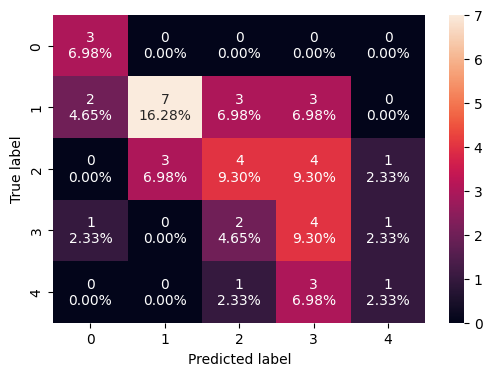

In [119]:
confusion_matrix_sklearn(nb_classifier, X_test, y_test)

In [120]:
# Predicting on test data
y_pred_test_nb = nb_classifier.predict(X_test)

In [121]:
print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

           I       0.50      1.00      0.67         3
          II       0.70      0.47      0.56        15
         III       0.40      0.33      0.36        12
          IV       0.29      0.50      0.36         8
           V       0.33      0.20      0.25         5

    accuracy                           0.44        43
   macro avg       0.44      0.50      0.44        43
weighted avg       0.48      0.44      0.44        43



## LOGISTIC REGRESSION 

In [123]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Confusion Matrix**

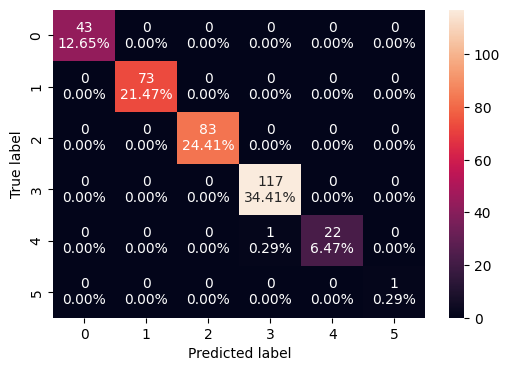

In [124]:
confusion_matrix_sklearn(logistic_model, X_train, y_train)

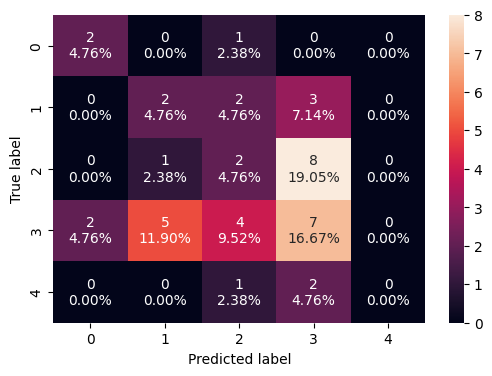

In [125]:
confusion_matrix_sklearn(logistic_model, X_valid, y_valid)

In [127]:
# Predicting on train data
y_pred_train_logistic = logistic_model.predict(X_train)

# Predicting on test data
y_pred_valid_logistic = logistic_model.predict(X_valid)

**Classification report**

In [128]:
print(classification_report(y_train, y_pred_train_logistic))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00        43
          II       1.00      1.00      1.00        73
         III       1.00      1.00      1.00        83
          IV       0.99      1.00      1.00       117
           V       1.00      0.96      0.98        23
          VI       1.00      1.00      1.00         1

    accuracy                           1.00       340
   macro avg       1.00      0.99      1.00       340
weighted avg       1.00      1.00      1.00       340



In [129]:
print(classification_report(y_valid, y_pred_valid_logistic))

              precision    recall  f1-score   support

           I       0.50      0.67      0.57         3
          II       0.25      0.29      0.27         7
         III       0.20      0.18      0.19        11
          IV       0.35      0.39      0.37        18
           V       0.00      0.00      0.00         3

    accuracy                           0.31        42
   macro avg       0.26      0.30      0.28        42
weighted avg       0.28      0.31      0.29        42



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [130]:
# Predicting on test data
y_pred_test_logistic = logistic_model.predict(X_test)

In [131]:
print(classification_report(y_test, y_pred_test_logistic))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00         3
          II       0.75      0.40      0.52        15
         III       0.45      0.42      0.43        12
          IV       0.32      0.75      0.44         8
           V       0.50      0.20      0.29         5

    accuracy                           0.49        43
   macro avg       0.60      0.55      0.54        43
weighted avg       0.58      0.49      0.49        43



## Build KNN Model

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [134]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

**Confusion Matrix**

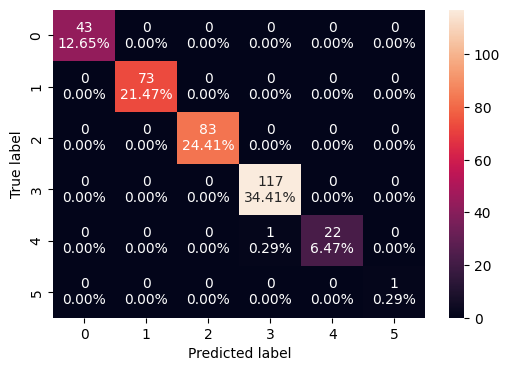

In [136]:
confusion_matrix_sklearn(knn_model, X_train, y_train)

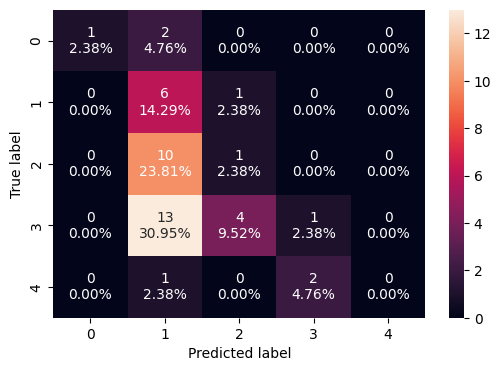

In [137]:
confusion_matrix_sklearn(knn_model, X_valid, y_valid)

In [138]:
# Predicting on train data
y_pred_train_knn = knn_model.predict(X_train)

# Predicting on test data
y_pred_valid_knn = knn_model.predict(X_valid)

**Classification report**

In [139]:
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00        43
          II       1.00      1.00      1.00        73
         III       1.00      1.00      1.00        83
          IV       0.99      1.00      1.00       117
           V       1.00      0.96      0.98        23
          VI       1.00      1.00      1.00         1

    accuracy                           1.00       340
   macro avg       1.00      0.99      1.00       340
weighted avg       1.00      1.00      1.00       340



In [140]:
print(classification_report(y_valid, y_pred_valid_knn))

              precision    recall  f1-score   support

           I       1.00      0.33      0.50         3
          II       0.19      0.86      0.31         7
         III       0.17      0.09      0.12        11
          IV       0.33      0.06      0.10        18
           V       0.00      0.00      0.00         3

    accuracy                           0.21        42
   macro avg       0.34      0.27      0.20        42
weighted avg       0.29      0.21      0.16        42



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [141]:
# Predicting on test data
y_pred_test_knn = knn_model.predict(X_test)

In [142]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           I       0.00      0.00      0.00         3
          II       0.39      0.80      0.52        15
         III       0.43      0.25      0.32        12
          IV       0.50      0.25      0.33         8
           V       0.00      0.00      0.00         5

    accuracy                           0.40        43
   macro avg       0.26      0.26      0.23        43
weighted avg       0.35      0.40      0.33        43



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Support Vector Machine

In [145]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.025, C=3)

In [146]:
svm_classifier.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [147]:
# Predicting on train data
y_pred_train_svm = svm_classifier.predict(X_train)

# Predicting on validation data
y_pred_valid_svm = svm_classifier.predict(X_valid)

# Predicting on test data
y_pred_test_svm = svm_classifier.predict(X_test)

**Classification report**

In [148]:
print(classification_report(y_train, y_pred_train_svm))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00        43
          II       1.00      0.99      0.99        73
         III       0.99      1.00      0.99        83
          IV       0.99      1.00      1.00       117
           V       1.00      0.96      0.98        23
          VI       1.00      1.00      1.00         1

    accuracy                           0.99       340
   macro avg       1.00      0.99      0.99       340
weighted avg       0.99      0.99      0.99       340



In [149]:
print(classification_report(y_valid, y_pred_valid_svm))

              precision    recall  f1-score   support

           I       1.00      0.67      0.80         3
          II       0.33      0.14      0.20         7
         III       0.33      0.45      0.38        11
          IV       0.55      0.67      0.60        18
           V       0.00      0.00      0.00         3

    accuracy                           0.48        42
   macro avg       0.44      0.39      0.40        42
weighted avg       0.45      0.48      0.45        42



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [150]:
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00         3
          II       1.00      0.33      0.50        15
         III       0.46      0.50      0.48        12
          IV       0.27      0.75      0.40         8
           V       0.00      0.00      0.00         5

    accuracy                           0.47        43
   macro avg       0.55      0.52      0.48        43
weighted avg       0.60      0.47      0.45        43



C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rvyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [151]:
y

0       IV
1       IV
2      III
3        I
4       IV
      ... 
420    III
421     II
422     II
423     II
424     II
Name: Potential Accident Level, Length: 425, dtype: object

In [152]:
print("Class distribution before SMOTE:")
print(y.value_counts())

Class distribution before SMOTE:
Potential Accident Level
IV     143
III    106
II      95
I       49
V       31
VI       1
Name: count, dtype: int64
